### Task 3. Gradient Descent

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [10]:
def f(x: tuple) -> float:
    '''Returns a value of Himmelblau function at the given point.
    :param : is a tuple representing a point (u,v).
    :return: a function value.
    '''
    u, v = x
    function_value = (u ** 2 + v - 11) ** 2 + (u + v ** 2 - 7) ** 2
    return function_value
    

def f_gradient(x: tuple) -> tuple:
    '''Returns a gradient of Himmelblau function at the input point of a function.
    :param : is a tuple representing a point at which the gradient is calculated.
    :return: a tuple of gradient coordinates.
    '''
    u, v = x
    u_coordinate = 4 * (u ** 2 + v - 11) * u + 2 * (u + v ** 2 - 7)
    v_coordinate = 2 * (u ** 2 + v - 11) + 4 * (u + v ** 2 - 7) * v
    return u_coordinate, v_coordinate


def gradient_descent(f,grad_f,eta,u0,v0,max_iter=100):
    '''
    Finds a minimum of the function using a gradient-descent algorithm.
    :param f: a function, takes a tuple with a point (u,v) as input. 
              Returns a function value in a given point.
    "param grad_f: a function calculating the functiobn gradient coordinates.
                   Takes a point (u,v) as an input. Returns a tuple of coordinates (du, dv).
    :param eta: a step-size function. Takes an iteration number and a constant of step as input.
                Returns a step.
    :param u0: initial u coordinate.
    :param v0: initial v coordinate.
    :param max_iter: the number of maximum iteration.
    :Return: a tuple with 
    '''
    u, v = u0, v0
    u_path, v_path = [u], [v]
    f_values = [f((u,v,))]  

    for t in range(1, max_iter+1):
        u_grad, v_grad = f_gradient((u, v,)) 
        u -= eta(t) * u_grad 
        v -= eta(t) * v_grad

        u_path.append(u)
        v_path.append(v)
        f_values.append(f((u, v)))

    return (u_path, v_path), f_values
        

def eta_const(t,c=1e-3):
    return c


def eta_sqrt(t,c=1e-3):
    return c / (t + 1) ** 0.5


def eta_multistep(t,milestones=[20,50],c=1e-4,eta_init=1e-3):
    if t < milestones[0]:
        return eta_init
    elif milestones[0] <= t < milestones[1]:
        return c * eta_init
    elif t >= milestones[1]:
        return (c ** 2) * eta_init
    

### Task 3a. Constant Step Size

In [11]:
eta_const_strategy = gradient_descent(f,f_gradient,eta_const,4,-5)
final_function_value_eta_const = eta_const_strategy[1][-1]
best_value_eta_const = min(eta_const_strategy[1][:])

print(f'Constant eta strategy: f_value = {final_function_value_eta_const}, minimum of f_values = {best_value_eta_const}.')

Constant eta strategy: f_value = 0.028936222243675813, minimum of f_values = 0.028936222243675813.


### Task 3b. Decreasing Step Size

In [12]:
eta_root_strategy = gradient_descent(f,f_gradient,eta_sqrt,4,-5)
final_function_value_eta_root = eta_root_strategy[1][-1]
best_value_eta_root = min(eta_root_strategy[1][:])

print(f'Square root eta strategy: f_value = {final_function_value_eta_root}, minimum of f_values = {best_value_eta_root}.')

Square root eta strategy: f_value = 14.481427564356759, minimum of f_values = 14.481427564356759.


### Task 3c. Multi-step Schedule

In [14]:
eta_multistep_strategy = gradient_descent(f,f_gradient,eta_multistep,4,-5)
final_function_value_eta_multistep = eta_multistep_strategy[1][-1]
best_value_eta_multistep = min(eta_multistep_strategy[1][:])

print(f'Multi-step eta strategy: f_value = {final_function_value_eta_multistep}, minimum of f_values = {best_value_eta_multistep}.')

Multi-step eta strategy: f_value = 11.190223188008511, minimum of f_values = 11.190223188008511.


### Task 3d. Initialization

Initial point = (-4, 0).Final point = (-3.1527685060505615,-3.1527685060505615).Final function value = 95.87854333645393.
Initial point = (0, 0).Final point = (2.908593470343879,2.908593470343879).Final function value = 0.2836291681954541.
Initial point = (4, 0).Final point = (3.450356945147482,3.450356945147482).Final function value = 11.185850747696733.
Initial point = (0, 4).Final point = (-2.367112070588055,-2.367112070588055).Final function value = 5.334202766920818.
Initial point = (5, 5).Final point = (2.9822282470041976,2.9822282470041976).Final function value = 0.026550944921419198.


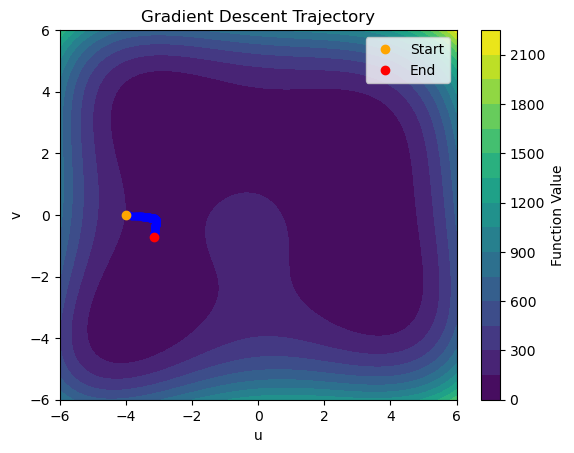

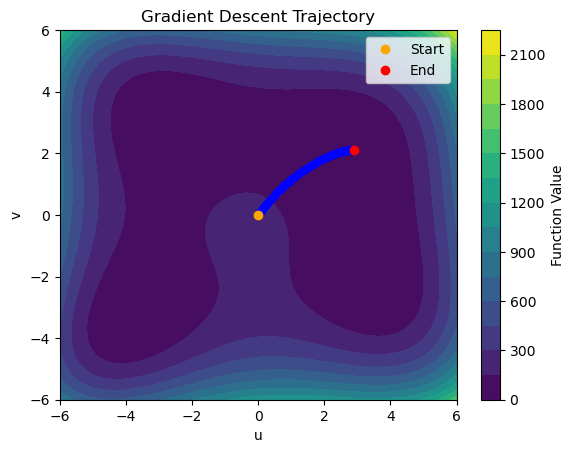

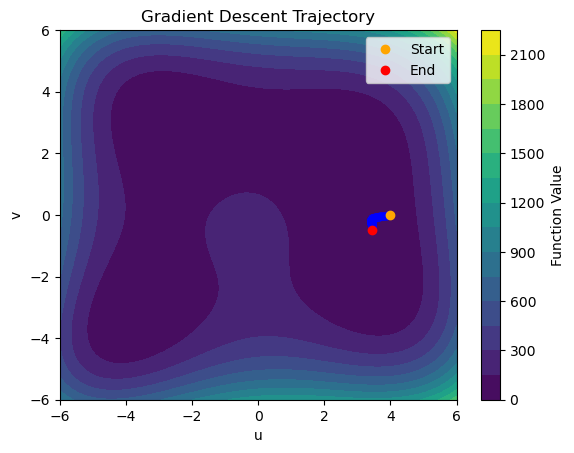

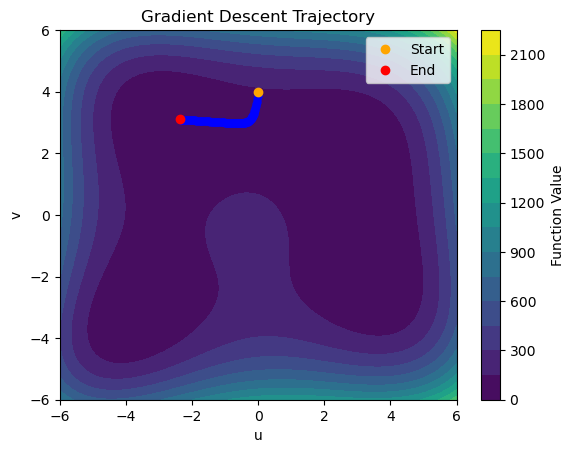

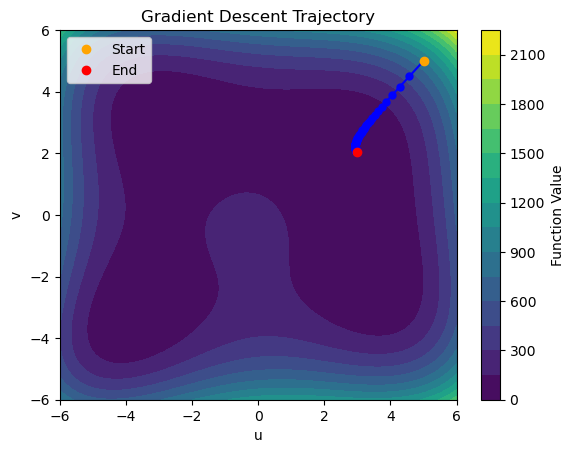

In [69]:
initial_points = [(-4,0), (0,0), (4,0), (0,4), (5,5)]

for u_0, v_0 in initial_points:
    eta_constant_strategy_init, values = gradient_descent(f,f_gradient,eta_const,u_0,v_0)
    print(f'Initial point = ({u_0}, {v_0}).'
          f'Final point = ({eta_constant_strategy_init[0][-1]},{eta_constant_strategy_init[0][-1]}).'
          f'Final function value = {values[-1]}.')
    fig, ax = plt.subplots()

    # Create a grid for the contour plot
    x = np.linspace(-6, 6, 100)
    y = np.linspace(-6, 6, 100)
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))

    # Plot the contour of the objective function
    contour = ax.contourf(X, Y, Z, 20, cmap='viridis')

    cbar = fig.colorbar(contour, ax=ax)
    cbar.set_label('Function Value')  # Label for the colorbar

    # Plot the trajectory
    ax.plot(eta_constant_strategy_init[0], eta_constant_strategy_init[1], 'bo-', markersize=5)  # Blue dots for trajectory

    # Mark the start and end points
    ax.plot(eta_constant_strategy_init[0][0], eta_constant_strategy_init[1][0], 'o', color='orange', label="Start")  # Green dot for start
    ax.plot(eta_constant_strategy_init[0][-1], eta_constant_strategy_init[1][-1], 'ro', label="End")  # Red dot for end

    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_title('Gradient Descent Trajectory')
    ax.legend()
    

plt.show()

Initial point = (-4, 0).Final point = (-3.1527685060505615,-3.1527685060505615).Final function value = 95.87854333645393.
Initial point = (0, 0).Final point = (2.908593470343879,2.908593470343879).Final function value = 0.2836291681954541.
Initial point = (4, 0).Final point = (3.450356945147482,3.450356945147482).Final function value = 11.185850747696733.
Initial point = (0, 4).Final point = (-2.367112070588055,-2.367112070588055).Final function value = 5.334202766920818.
Initial point = (5, 5).Final point = (2.9822282470041976,2.9822282470041976).Final function value = 0.026550944921419198.


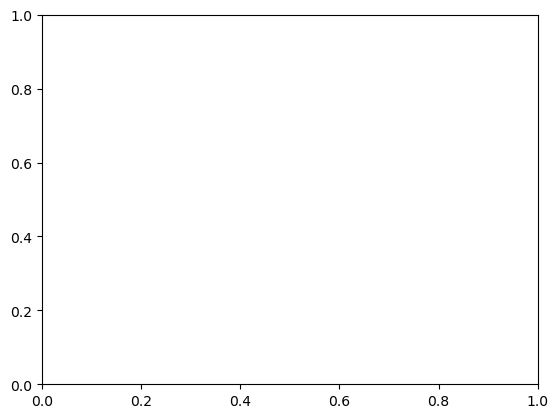

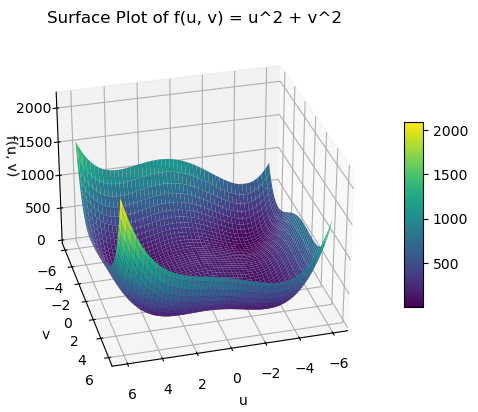

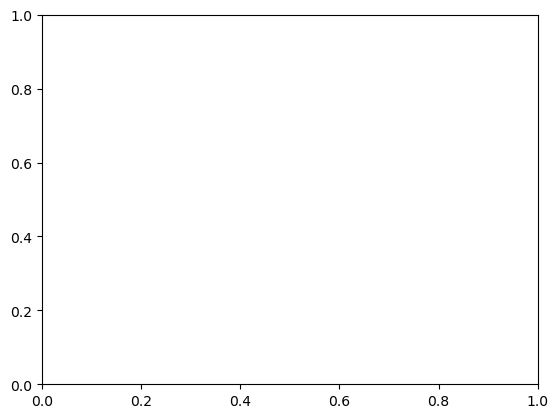

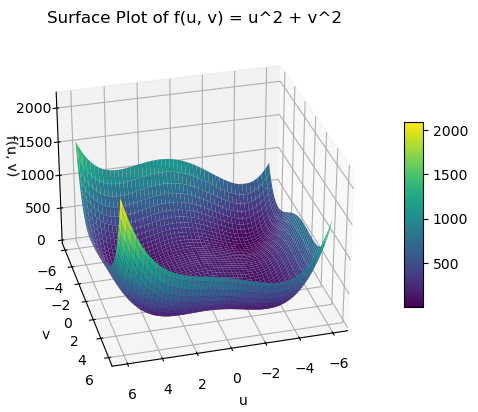

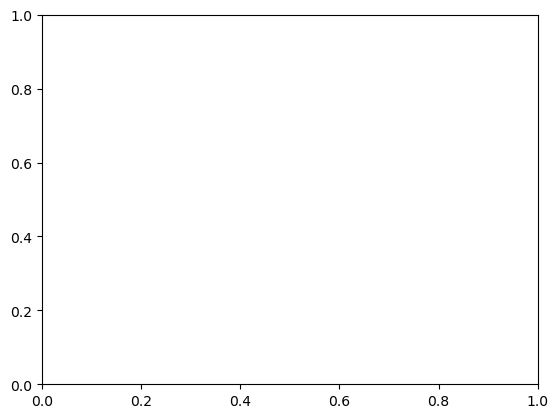

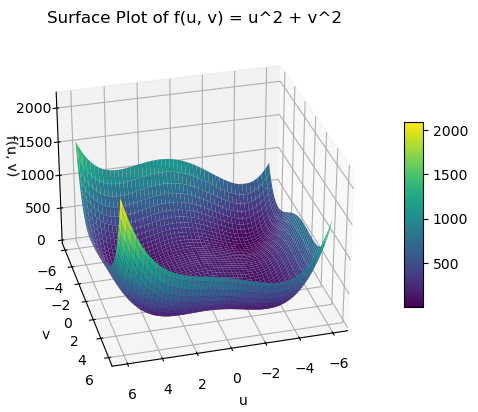

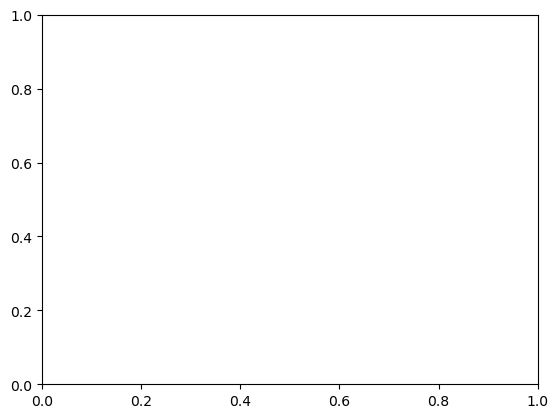

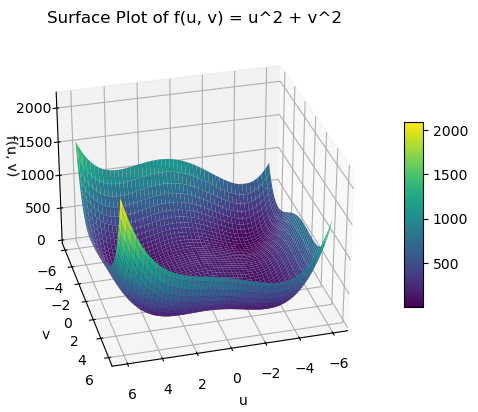

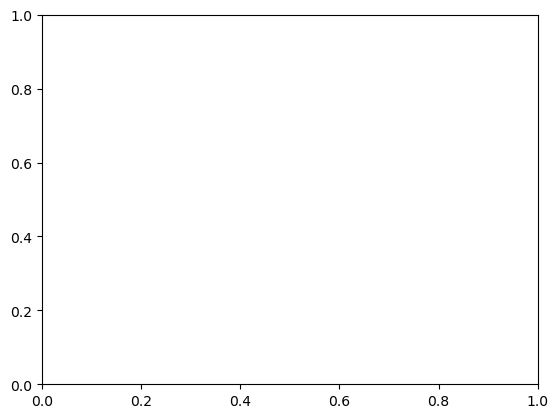

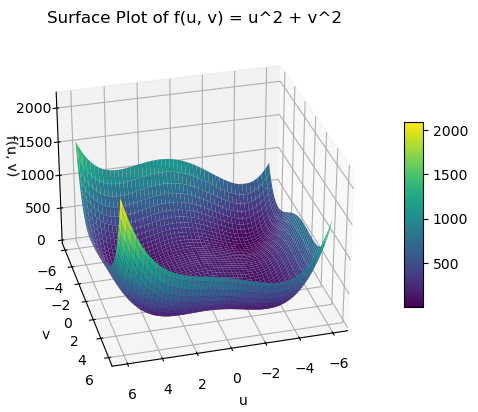

In [74]:
for u_0, v_0 in initial_points:
    eta_constant_strategy_init, values = gradient_descent(f,f_gradient,eta_const,u_0,v_0)
    print(f'Initial point = ({u_0}, {v_0}).'
          f'Final point = ({eta_constant_strategy_init[0][-1]},{eta_constant_strategy_init[0][-1]}).'
          f'Final function value = {values[-1]}.')
    fig, ax = plt.subplots()

    u = np.linspace(-6, 6, 100)
    v = np.linspace(-6, 6, 100)
    U, V = np.meshgrid(u, v)

    # Evaluate the function over the meshgrid
    Z = f((U, V))

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=30, azim=75)

    # Plot the surface
    surf = ax.plot_surface(U, V, Z, cmap='viridis', edgecolor='none')

    # Add a colorbar to indicate the function values
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

    # Set titles and labels
    ax.set_title('Surface Plot of f(u, v) = u^2 + v^2')
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('f(u, v)')

